### Extract collaboration graph based on co-editing patterns on the files

In [1]:
from config import repo_url, export_directory
from common import collect_commits

In [2]:
commits = collect_commits(repo_url)

In [3]:
import networkx as nx
from networkx.algorithms import bipartite

def extract_graph(commits):
    # extract a bipartite graph containing author emails and edited files
    bg = nx.Graph()
    
    for c in commits:
        author_email = c['author_email']
        if not bg.has_node(author_email):
            bg.add_node(author_email, type='author_email')
        for m in c['modifications']:
            file_path = m['new_path']
            if not bg.has_node(file_path):
                bg.add_node(file_path, type='file_path')
            bg.add_edge(author_email, file_path)
            
    authors = [n for n in bg.nodes if bg.nodes[n]['type'] == "author_email"]
    file_paths = [n for n in bg.nodes if bg.nodes[n]['type'] == "file_path"]            
            
    return bg, authors, file_paths

In [4]:
bg, authors, file_paths = extract_graph(commits)

In [5]:
g = bipartite.projected_graph(bg, authors)

### Store projected graph in a json file format

In [6]:
from networkx.readwrite import json_graph
import json
from pathlib import Path

DATA_PATH = Path(export_directory)
FILE_PATH = DATA_PATH / "collabgraph.json"

with open(FILE_PATH, 'w') as f:
    json.dump(json_graph.node_link_data(g),f)

In [7]:
from networkx.classes import function
function.density(g)

0.1908569905371185

### Visualize projected graph with matrix

In [12]:
def visualize_adjacency_matrix(g):

    import seaborn as sns
    import networkx as nx
    sns.set()

    # Convert the palette to vectors that will be drawn on the side of the matrix

    mat = nx.to_numpy_matrix(g)
    
    # Draw the full plot
    sns.clustermap(mat, center=0, cmap="vlag",
                   linewidths=.75)


/Users/panpanxu/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
/Users/panpanxu/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


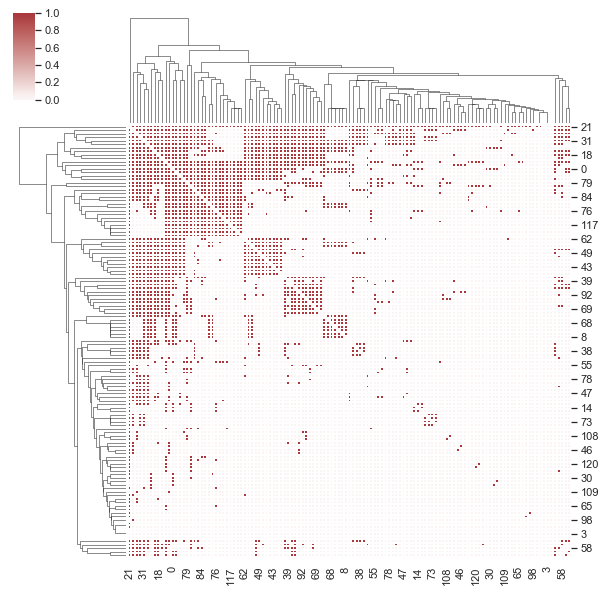

In [13]:
visualize_adjacency_matrix(g)